# EP2 - Perceptron de Rosenblatt

Text(0.5, 0, 'iterações')

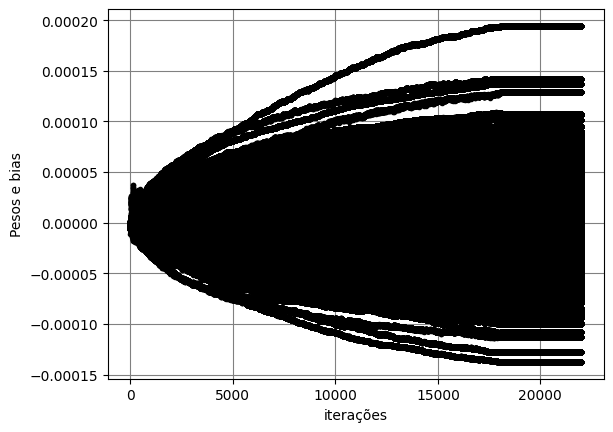

In [ ]:
# Bibliotecas usadas no programa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando banco de dados do treinamento já tratado

data_df = pd.read_csv("circles_and_squares.csv")
#print(data_df.head(2))

# Conversao em array

data = data_df.to_numpy()
#print(data_df.shape)

# Apresentacao como uma imagem

img = data[203, :-1].reshape((20,20))
#plt.imshow(img, cmap='gray')

# Separação dos dados de entrada e saída
# -1: circulo
#  1: quadrado

treinamento = data[:800, :]
x_treinamento = np.delete(treinamento, -1, 1)
d_treinamento = treinamento[:, -1].reshape(-1, 1)

eta = 0.00001  # passo de adaptação do algoritmo de Rosenblatt
Ne = 2000
Nb = 70
Nt = 800

W = Rosenblatt_minibatch(x_treinamento, d_treinamento, eta, Nt, Ne, Nb)

# Wfinal deve ser os valores de pesos e bias da última iteração
it_final = Ne * int(np.floor(Nt / Nb))
Wfinal = W[it_final, :]

# Mostra os valores dos pesos ao longo das épocas

plt.figure()
plt.plot(W, ".-k", label="Rosenblatt")
plt.ylabel("Pesos e bias")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.xlabel("iterações")

In [ ]:
# Perceptron de Rosenblatt

def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb):
    """
    W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """

    Nmb = int(np.floor(Nt / Nb))
    M = x.shape[1]
    W = np.zeros((Ne * Nmb + 1, M + 1))
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # No modo mini-batch, o passo de adaptação é dividido por Nb
    eta2 = eta / Nb
    for k in range(1, Ne + 1):
        np.random.shuffle(Xd)
        x2 = Xd[:, 0 : M + 1]
        d2 = Xd[:, [M + 1]]
        for l in range(Nmb):
            m = (k-1) * Nmb + l + 1
            dmb = d2[l * Nb : (l + 1) * Nb]
            xmb = x2[l * Nb : (l + 1) * Nb, :]
            lu = np.heaviside(xmb @ W[m-1, :].T, 1)
            for j in range(lu.shape[0]):
              if lu[j] == 0:
                  lu[j] = - 1

            emb = (dmb[:,0] - lu)
            Gmb = xmb.T @ emb
            W[m, :] = W[m-1, :] + ((eta2) * (Gmb)).T

    return W


Quantidade de erros entre 200 amostras:  60.0

Acurácia:  0.7

Taxa de erro: 60.0



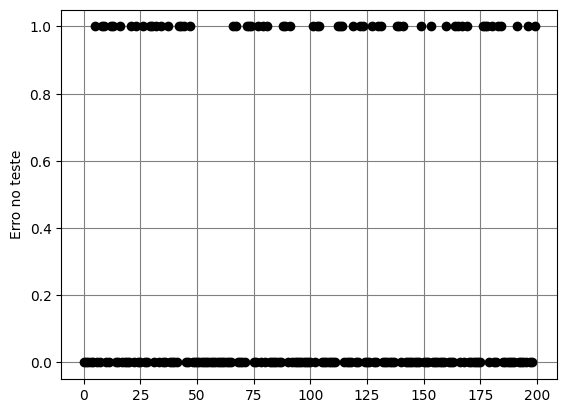

In [ ]:
# Separacao do treinamento e do teste

teste = data[800:, :]

Xd_test = np.hstack((np.ones((200, 1)), teste))
d_teste = Xd_test[:, [400 + 1]]
x_teste = Xd_test[:, 0 : 400 + 1]

# Processamento das saídas produzidas pelo modelo

saida_teste = np.heaviside(x_teste @ Wfinal.T, 1)

for j in range(saida_teste.shape[0]):
    if saida_teste[j] == 0:
        saida_teste[j] = - 1

# Comparação entre saída esperada e gerada

erro_teste = (d_teste[:,0] - saida_teste)

print("\nQuantidade de erros entre 200 amostras: ", np.sum(np.abs(erro_teste/2)))
print("\nAcurácia: " , 1 - np.sum(np.abs(erro_teste/2))/200)

plt.figure()
plt.plot(np.absolute(erro_teste/2), "ok", label="Rosenblatt")
Taxa_de_erro = np.sum(np.absolute(erro_teste)) * 100 / 200
print(f"\nTaxa de erro: {Taxa_de_erro}\n")
plt.ylabel("Erro no teste")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")